In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [25]:
pulse_amt=650000  # this is in milligram  
effective_dose=1*pulse_amt*1000
interval=4
initial_dose=effective_dose
cur_amt=0
volume=3000 # volm is  3000 ml
half_life=3.2 #half lide of delantin
k=np.log(2)/half_life # natural logarithm is inverse of the exponential, k is the elimination const
cur_amt

0

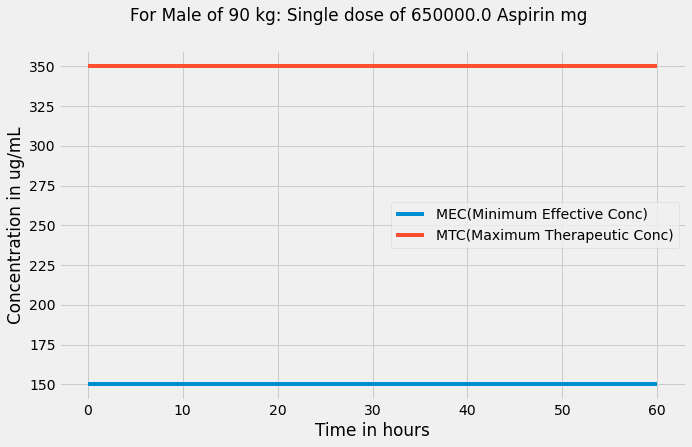

In [31]:
cur_amt
time_steps=15
time_values=[]
for i in np.arange(0,(time_steps-1)*interval+1,interval):
    time_values.append(i)
    time_values.append(i)
conc_values_just_after=np.zeros(time_steps) # starting y values for 20 days
conc_values_just_before=np.zeros(time_steps)
conc_val=[]
for i in range(time_steps): # moving through each of the day
    cur_amt=cur_amt*np.exp(-1*k*interval)
    conc_values_just_before[i]=cur_amt
    #print(cur_amt)
    cur_amt=cur_amt+effective_dose
    conc_values_just_after[i]=cur_amt
    conc_val.append(conc_values_just_before[i])
    conc_val.append(conc_values_just_after[i])
conc_val=np.array(conc_val)
conc_val/=volume
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.xlabel('Time in hours')
plt.ylabel('Concentration in ug/mL') # MEC and MEF conc
str='For Male of 90 kg: Single dose of {} {} mg '.format(effective_dose/1000,"Aspirin")
plt.suptitle(str)

x_values=np.linspace(0,interval*time_steps,1000)
plt.plot(x_values,[150]*1000,label="MEC(Minimum Effective Conc)")
plt.plot(x_values,[350]*1000,label="MTC(Maximum Therapeutic Conc)") # 150 to 300 ug/ml
plt.legend()




In [27]:
time_values

[0,
 0,
 8,
 8,
 16,
 16,
 24,
 24,
 32,
 32,
 40,
 40,
 48,
 48,
 56,
 56,
 64,
 64,
 72,
 72,
 80,
 80,
 88,
 88,
 96,
 96,
 104,
 104,
 112,
 112,
 120,
 120,
 128,
 128,
 136,
 136,
 144,
 144,
 152,
 152]

In [23]:
conc_values

array([7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656,
       7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656,
       7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656, 7.5395656,
       7.5395656, 7.5395656, 7.5395656])

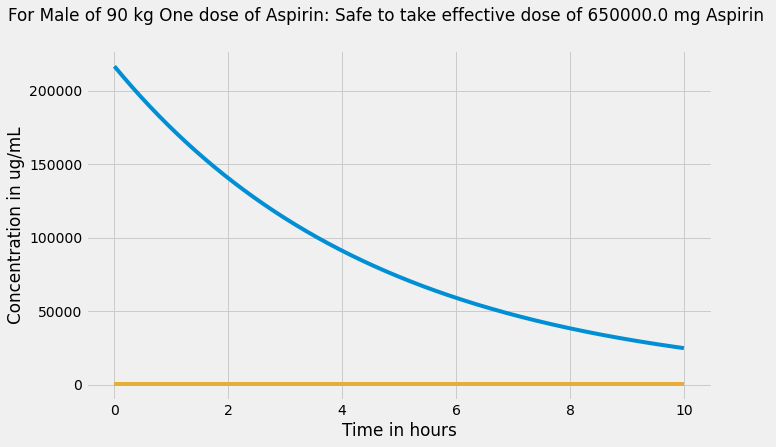

In [32]:
time_values=np.linspace(0,10,1000)
y_values=np.zeros(1000)

for ind in range(1000):
    y_values[ind]=(initial_dose/volume)*np.exp(-k*time_values[ind])
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.xlabel('Time in hours')
plt.ylabel('Concentration in ug/mL') # MEC and MEF conc
str='For Male of 90 kg One dose of Aspirin: Safe to take effective dose of {} mg {} '.format(effective_dose/1000,"Aspirin",interval)
plt.suptitle(str)
plt.plot(time_values,y_values)
plt.plot(time_values,[150]*1000,label="MEC(Minimum Effective Conc)")
plt.plot(time_values,[350]*1000,label="MTC(Maximum Therapeutic Conc)") # 150 to 300 ug/ml

In [47]:
#effective_dose=4500*1000 # effective impulsive dose 
effective_dose=100*1000 #325 mg or 325000 ug
def impulse_at_t(t):
    if(t==0):  
            return 1*400*1000
    elif(t==2 or t==4):
            return 1*300*1000
    elif(t<28): 
            return 0
    elif((t-28)%8==0):
            return 1*100*1000
    else:
        return 0
    
# def impulse_at_t(t):
#     if(t==0):  
#             return 1*325*1000
#     return 0
# def impulse_at_t(t):
#     if(t==0):  
#             return 3*325*1000
#     elif(t==2):
#             return 2*325*1000
#     return 0

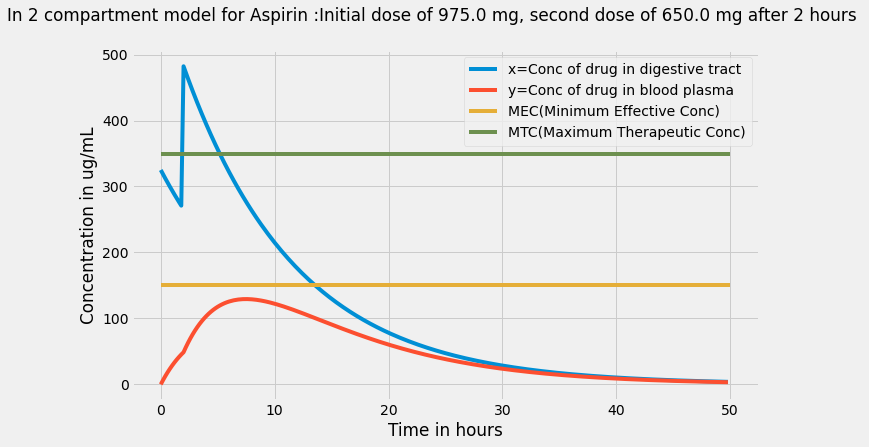

In [43]:
# for the 2 compartment model
x_t=0
y_t=0  # x_t denotes the amt of drug in the digestive tract and y_t denotes the amt of drug in the blood plasma
time_step=0.2 # for 0.1 hour, 650 ug 
max_time=50 # max_time that u want to see in the plot is 14 hours
volume=3000
effective_dose=325*1000

k1=0.1 # k1 can be thought of as absorption rate constant of the drug from the digestive tract to blood plasma
k2=np.log(2)/3.2 # k2 is the half life of the aspirin drug

time_vals=np.arange(0,max_time,time_step)
x_values=np.zeros((int)(max_time/time_step)) # max_time that u want to see is 14 hrs
y_values=np.zeros((int)(max_time/time_step))

for i in range(len(x_values)):
    y_t=y_t+(k1*x_t-k2*y_t)*time_step
    x_t=x_t+impulse_at_t(time_vals[i])-(x_t*k1)*time_step # amt of drug in digestive tract at any next time step
     # amt of drug in the blood plasma at the m    
    x_values[i]=x_t # x_vals at this particluar time step
    y_values[i]=y_t
# print(x_values)
# print(y_values)
    
x_values/=volume
y_values/=volume
    
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.xlabel('Time in hours')
plt.ylabel('Concentration in ug/mL') # MEC and MEF conc
str='In 2 compartment model for Aspirin :Initial dose of {} mg, second dose of {} mg after 2 hours '.format((effective_dose*3)/1000,(effective_dose*2)/1000) # single dose of  
plt.suptitle(str)
plt.plot(time_vals,x_values,label='x=Conc of drug in digestive tract')
plt.plot(time_vals,y_values,label='y=Conc of drug in blood plasma')
plt.plot(np.linspace(0,50,1000),[150]*1000,label="MEC(Minimum Effective Conc)")
plt.plot(np.linspace(0,50,1000),[350]*1000,label="MTC(Maximum Therapeutic Conc)") # 150 to 300 ug/ml
plt.legend()




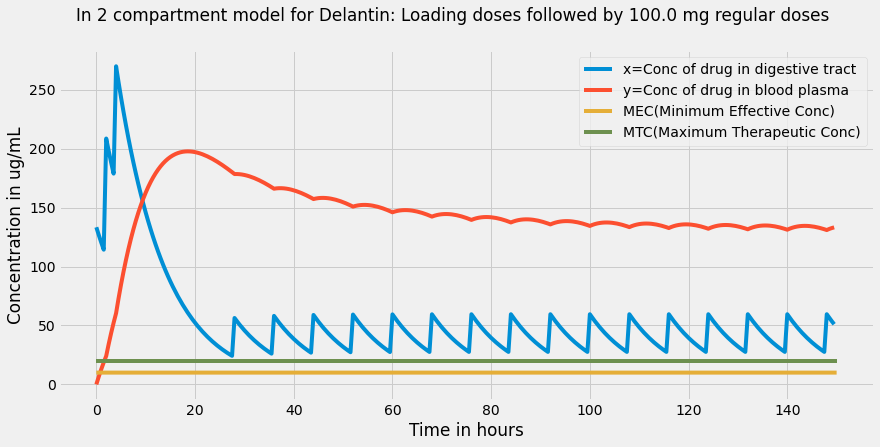

In [51]:
x_t=0
y_t=0  # x_t denotes the amt of drug in the digestive tract and y_t denotes the amt of drug in the blood plasma
time_step=0.5 # for 0.1 hour, 650 ug 
max_time=150 # max_time that u want to see in the plot is 14 hours
effective_dose=100*1000

k1=0.1 # k1 can be thought of as absorption rate constant of the drug from the digestive tract to blood plasma
k2=np.log(2)/22 # k2 is the half life of the aspirin drug

time_vals=np.arange(0,max_time,time_step)
x_values=np.zeros((int)(max_time/time_step)) # max_time that u want to see is 14 hrs
y_values=np.zeros((int)(max_time/time_step))

for i in range(len(x_values)):
    y_t=y_t+(k1*x_t-k2*y_t)*time_step
    x_t=x_t+impulse_at_t(time_vals[i])-(x_t*k1)*time_step # amt of drug in digestive tract at any next time step
     # amt of drug in the blood plasma at the m
        
    x_values[i]=x_t # x_vals at this particluar time step
    y_values[i]=y_t
    # impulse at any time t is defined

# print(x_values)
# print(y_values)
    
x_values/=volume
y_values/=volume
    
fig,ax=plt.subplots(1,1,figsize=(13,6))
plt.xlabel('Time in hours')
plt.ylabel('Concentration in ug/mL') # MEC and MEF conc
str='In 2 compartment model for {}: Loading doses followed by {} mg regular doses'.format("Delantin",effective_dose/1000) # single dose of  
plt.suptitle(str)
plt.plot(time_vals,x_values,label='x=Conc of drug in digestive tract')
plt.plot(time_vals,y_values,label='y=Conc of drug in blood plasma')
plt.plot(np.linspace(0,150,10000),[10]*10000,label="MEC(Minimum Effective Conc)")
plt.plot(np.linspace(0,150,1000),[20]*1000,label="MTC(Maximum Therapeutic Conc)") # 150 to 300 ug/ml
plt.legend()


In [ ]:
# minimum effective concentration